# ASHWIN SURESH (21MIS1174)

# First will load the file to the variable filepath

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# loading file
filepath ='C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/SUV.csv'

# Reading the csv file with the help of 'pandas' library

In [2]:
data=pd.read_csv(filepath)

# Reading the csv file with the help of 'pandas' library

In [3]:
# Encoding 'Gender' column
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data.drop(columns='User ID', axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


# First 5 data is displayed.. Pre-processing is not much needed as for prediction and classification User ID and Gender will be discarded.. Remaining values are anyways in numerical form

In [4]:
data.head() # First 5 rows of the dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


# Will analyze what is the size of the dataset

In [5]:
data.shape

(400, 5)

# We need to first check the dataset if any null or empty data is there

In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

# We need to classify Features (Age, Salary) and Target (Purchase)

In [8]:
# Now User ID is unique so we don't need it for classification
# Extracting Independent and Dependent Variable  
x = data.iloc[:, 1:4].values  
y = data.iloc[:, 4].values 

# Here we start splitting the dataset into training and testing using sklearn library and we split in that ratio of 80:20 where 80 represents training set and 20 testing/validating set

In [9]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 0)  

# Feature Scaling is required for reducing the gap/distance between features such as GENDER which is 0 (Male) or 1 (Female), AGE which is likely between 20-60 whereas SALARY between 20000 to 140000 and normalize the features subsequently

In [10]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)  

## Using Naive Bayes algorithm we import specifically Gaussian which 

# P(A|B) = ( P(B|A) * P(A) ) / P(B)

## Since P(B) is in denominator we can easily ignore it to reduce our calculations, these are already specified in normally distributed GaussianNB package.. Just using the function we can train our model

In [11]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)

# Predict Output
predicted = model.predict([x_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


# The prediction model produces a set of predicted values in an array

In [12]:
# Based on the trained model predicting the target column
y_pred = model.predict(x_test)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

# To classify the result we use confusion matrix and classification report

In [13]:
# Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix, classification_report  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[56,  2],
       [ 4, 18]], dtype=int64)

# The classification report contains Precision, Recall, F1-Score, Accuracy, etc.

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [15]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print(f"Accuracy: {accuracy*100} %")
print("F1 Score:", f1)

Accuracy: 92.5 %
F1 Score: 0.9261501210653755


# Importing MATLAB plotting libraries for graphical representation

In [16]:
import matplotlib.pyplot as plt    # from matplotlib import pyplot as plt
%matplotlib inline

# It is better to visualize the confusion matrix as heatmap for better clarity

<Axes: >

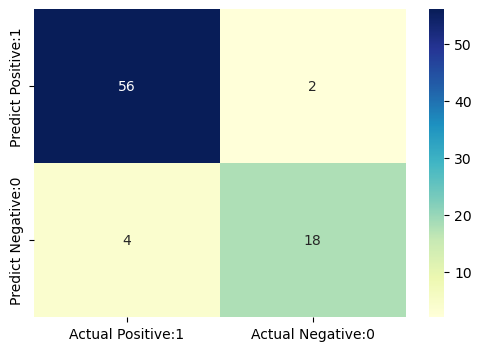

In [17]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Now we visualize the two clusters with respect to two main features (AGE & SALARY) and plot them for better understanding

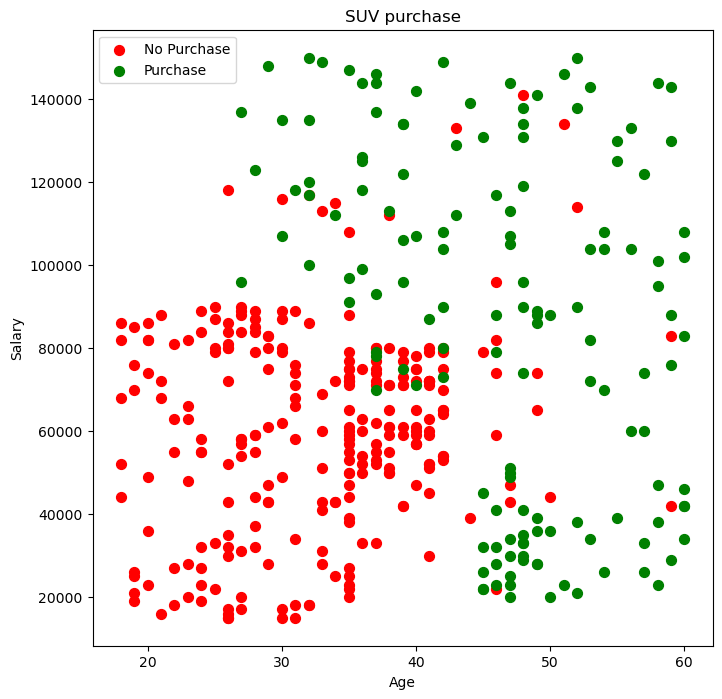

In [18]:
# plotting all the clusters
plt.figure(figsize=(8, 8))
plt.scatter(x[y==0,1], x[y==0,2], s=50, color='red', label='No Purchase')
plt.scatter(x[y==1,1], x[y==1,2], s=50, color='green', label='Purchase')

plt.title('SUV purchase')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Now we visualize the two clusters with respect to all the features in a 3D graph to see how they vary
### Here we have only 3 features so it became easier to plot in 3D graph, otherwise some common mechanism should be applied

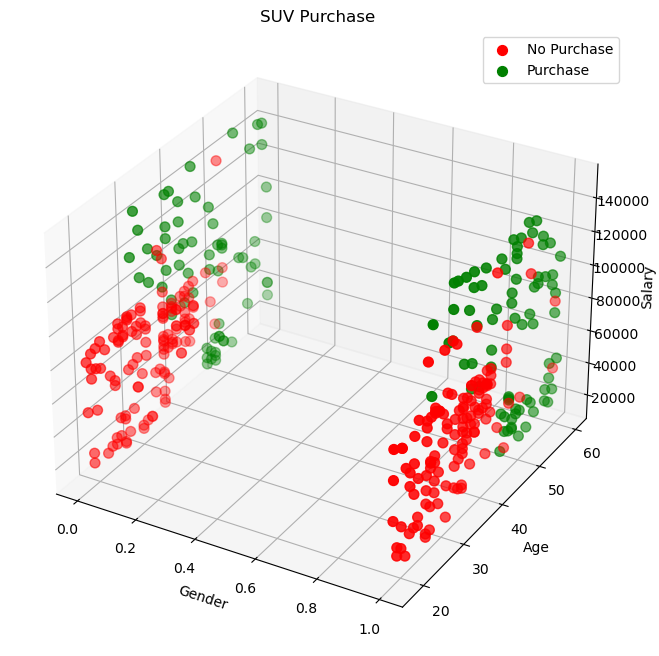

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming x contains Age, Salary, and Gender columns
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for class 0
ax.scatter(x[y == 0, 0], x[y == 0, 1], x[y == 0, 2], s=50, color='red', label='No Purchase')

# Scatter plot for class 1
ax.scatter(x[y == 1, 0], x[y == 1, 1], x[y == 1, 2], s=50, color='green', label='Purchase')

ax.set_title('SUV Purchase')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')

plt.legend()
plt.show()

In [20]:
print( 'Training set score: {: .4f}'.format(model.score(x_train, y_train)))
print( 'Test set score: {: .4f}'.format(model.score(x_test, y_test)))

Training set score:  0.8812
Test set score:  0.9250


# Final interpretation